# **Import Libraries**



In [239]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# **Load DataSet**

In [ ]:
df = pd.read_csv("/content/List of best-selling PlayStation 4 video games.csv")

In [ ]:
print(df.head())

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.describe()

# **Data Preproccesing**

In [ ]:
df.rename(columns={"Release date[a]": "ReleaseYear"}, inplace=True)
df.rename(columns={"Copies sold": "CopiesSold"}, inplace=True)
lst = []
for i in df['CopiesSold']:
  lst.append(i.split()[0])
df['CopiesSold'] = lst
df['CopiesSold'] = pd.to_numeric(df["CopiesSold"])
df["ReleaseYear"] = pd.to_datetime(df["ReleaseYear"])
df["ReleaseYear"] = df["ReleaseYear"].dt.year

## **Data Analysis**

In [ ]:
barplot = px.bar(df, "Game", "CopiesSold")
barplot.show()

In [ ]:
df[df["CopiesSold"] >= 15]

,Game,CopiesSold,ReleaseYear,Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20.0,2018,Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19.5,2018,Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16.0,2016,Action-adventure,Naughty Dog,Sony Interactive Entertainment


In [ ]:
cercleplot = px.pie(df, "Genre(s)", "CopiesSold")
cercleplot.show()

# **Prediction**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



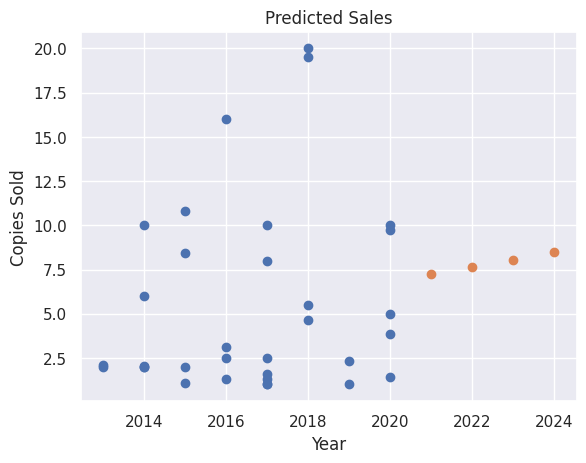

In [243]:

x = df[["ReleaseYear"]]
y = df["CopiesSold"]
model = LinearRegression()
model.fit(x, y)


years_to_predict = [[2021], [2022], [2023], [2024]]
sales_predicted = model.predict(years_to_predict)

plt.plot(df['ReleaseYear'], df['CopiesSold'], 'o')
plt.plot(years_to_predict, sales_predicted, 'o')
plt.xlabel('Year')
plt.ylabel('Copies Sold')
plt.title('Predicted Sales')
plt.show()